<a href="https://colab.research.google.com/github/skaflucas/Assignment1_ML2023/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygal_maps_world

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.8/270.8 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 2.3 MB/s eta 0:00:00
  Created wheel for pygal_maps_world: filename=pygal_maps_world-1.0.2-py3-none-any.whl size=278560 sha256=cf0d2433a2a521c7214de727467b0673e1d9b17962aa635443a743f341499e77
  Stored in directory: /root/.cache/pip/wheels/da/f5/1b/a241a2b0e32fc89b08d1f42d37e63e7ccc2c820bb14fffd031
Successfully built pygal_maps_world


In [ ]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pygal
import pygal_maps_world
from pygal_maps_world.maps import World
from pygal_maps_world.i18n import COUNTRIES

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [ ]:
articleInfo = pd.read_csv('/content/articleInfo.csv')
articleInfo

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type
0,1,Study of Virtual Reality Immersive Technology ...,2022,3.0,"virtual reality technologies, mathematics lear...",7.0,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal
1,2,Factors Influencing Nursing Students' Immersiv...,2021,2.0,virtual reality; learning; immersive media tec...,3.0,SENSORS,Background/objectives: This study aims to iden...,Journal
2,3,A Novel Immersive Anatomy Education System (An...,2022,17.0,immersive technology; augmented reality; anato...,2.0,APPLIED SCIENCES-BASEL,Immersive technologies are redefining ways of ...,Journal
3,4,Digital Learning Across Boundaries (DLAB): Imm...,2021,4.0,Digital literacy; Changing society; Social dyn...,3.0,RESEARCH IN EDUCATION AND LEARNING INNOVATION ...,The Digital Learning Across Boundaries: Develo...,Journal
4,5,"Connecting Macroscopic, Molecular, and Symboli...",2022,3.0,high school/introductory chemistry; laboratory...,0.0,EDUCATION SCIENCES,Redox reaction is a difficult concept to teach...,Journal
...,...,...,...,...,...,...,...,...,...
159,160,Virtual reality enhances safety training in th...,2022,2.0,non-WEIRD sample; safety training; simulation;...,3.0,Journal of Computer Assisted Learning,Objective: Many industries struggle with train...,Journal
160,161,Virtual reality for developing intercultural c...,2022,3.0,Affective domain; Cultural competence; Instruc...,1.0,Educational Technology Research & Development,Intercultural communicative competence (ICC) i...,Journal
161,162,Virtual reality in problem-based learning cont...,2021,3.0,English learning; motivation; problem-based le...,27.0,Journal of Computer Assisted Learning,Learning a foreign language requires interacti...,Journal
162,163,Virtual reality is more efficient in learning ...,2020,8.0,Virtual reality; Education; Human heart anatomy,36.0,New Ideas in Psychology,New technologies make their way into education...,Journal


In [ ]:
authorInfo = pd.read_csv('/content/authorInfo.csv')

In [ ]:
mergedData = pd.merge(articleInfo, authorInfo, on='Article No.') # Merges both datasets with common Article No.

In [ ]:
mergedData.fillna(0, inplace=True) # Fills any missing data (NaN) as 0
print(mergedData)

     Article No.                                              Title  Year  \
0              1  Study of Virtual Reality Immersive Technology ...  2022   
1              1  Study of Virtual Reality Immersive Technology ...  2022   
2              1  Study of Virtual Reality Immersive Technology ...  2022   
3              2  Factors Influencing Nursing Students' Immersiv...  2021   
4              2  Factors Influencing Nursing Students' Immersiv...  2021   
..           ...                                                ...   ...   
383           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
384           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
385           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
386           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   
387           81  Teaching Enzyme Catalysis Using Interactive Mo...  2019   

     Author Number                                          Key Words  \
0 

In [ ]:
# yearsCount = mergedData.groupby('Year').count()
years = mergedData.groupby('Year').count()
# years.index

yearsSum = mergedData.groupby('Year').sum()
yearsSum

,Article No.,Author Number,Citation,h-index
Year,,,,
2017,503,29.0,3340.0,43.0
2018,961,93.0,1690.0,83.0
2019,1201,105.0,1759.0,78.0
2020,3174,448.0,1653.0,439.0
2021,3768,463.0,1344.0,478.0
2022,6079,1083.0,417.0,423.0


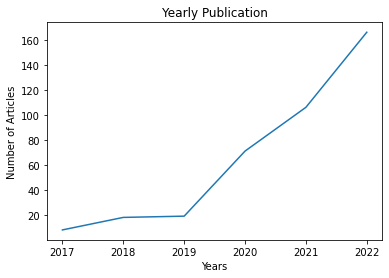

In [ ]:
plt.plot(years.index, years['Article No.'])

plt.title('Yearly Publication') # Sets the title of the figure
plt.xlabel('Years') # Sets the label of the x-axis
plt.ylabel('Number of Articles') # Sets the label of the y-axis
plt.show() # Displays the figure

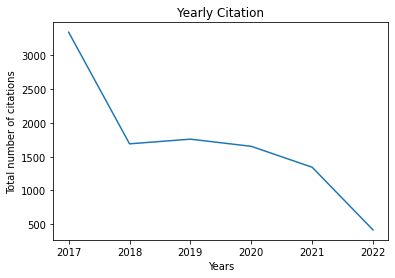

In [ ]:
plt.plot(yearsSum.index, yearsSum['Citation'])

plt.title('Yearly Citation') # Sets the title of the figure
plt.xlabel('Years') # Sets the label of the x-axis
plt.ylabel('Total number of citations') # Sets the label of the y-axis
plt.show() # Displays the figure

In [ ]:


# countriesLabels = []
# indexLabels = []
# xLabelsLoc = []

# for index, countries in enumerate(countriesData.index):
#   countriesLabels.append(countries)
#   indexLabels.append(index)

# print(countriesLabels)
# print(indexLabels)

# for index, _ in enumerate(indexLabels):
#   xLabelsLoc.append(0.025)

# plt.bar(countriesData['Article No.'], indexLabels, width=2)

# plt.title('Number of Articles per Country')
# plt.xlabel('Countries')
# plt.xticks(indexLabels, countriesLabels)
# plt.ylabel('Number of Articles')
# plt.show()

                      Article No.  Title  Year  Author Number  Key Words  \
Country                                                                    
0                               2      2     2              2          2   
Australia                      13     13    13             13         13   
Bristol                         1      1     1              1          1   
Canada                         12     12    12             12         12   
Chian                           1      1     1              1          1   
Chile                           3      3     3              3          3   
Chile                           6      6     6              6          6   
China                          34     34    34             34         34   
Cyprus                          7      7     7              7          7   
Czech Republic                 15     15    15             15         15   
Denamrk                         8      8     8              8          8   
Denmark     

In [ ]:
# testS = 'test '
# testNS = 'TESA '

# if testNS[-1] == ' ':
#   newTest = testNS[:-1]
# else:
#   newTest = testNS

# # substrtest = testNS[-1]
# print(newTest)

def get_country_code(country_name):
    # country_name = country_name.split(' ')[0]
    if country_name == 'Chian':
      country_name = 'China'
    elif country_name == 'Denamrk':
      country_name = 'Denmark'
    elif country_name == 'Korea':
      country_name = 'Korea, Republic of'
    elif country_name == 'Palestine':
      country_name = 'Palestine, State of'
    elif country_name == 'Russia':
      country_name = 'Russian Federation'
    elif country_name == 'Taiwan':
      country_name = 'tw'
    elif country_name == 'USA':
      country_name = 'United States'
    elif country_name == 'Bristol':
      country_name = 'United Kingdom'

    if country_name[-1] == ' ':
      country_name = country_name[:-1]
    else:
      country_name = country_name

    for code, name in COUNTRIES.items():
        if name == country_name:
            return code
    # If the country wasn't found, return None.
    return country_name

countriesData = mergedData.groupby('Country').count()

# testA = get_country_code('Chile')
# testB = get_country_code('Chile ')

# print(testA)
# print(testB)

# print(countriesData)

countryCodesData = {}

for index, country in enumerate(countriesData.index):
  if country != 0:
    countryCode = get_country_code(country)

    if countryCode in countryCodesData:
      # print(f'INCREMENTING: {country} by {countriesData.values[index][0]}')
      countryCodesData[countryCode] += countriesData.values[index][0]
    else:
      # print(f'SETTING NEW: {country}')
      countryCodesData[countryCode] = countriesData.values[index][0]

print(countryCodesData)

worldmap_chart = World()
worldmap_chart.title = 'Number of Publications'
worldmap_chart.add('N. of Articles', countryCodesData)
worldmap_chart.render_to_file('ArticlePerCountry.svg')

{'au': 13, 'gb': 31, 'ca': 12, 'cn': 35, 'cl': 9, 'cy': 7, 'cz': 15, 'dk': 13, 'fr': 7, 'de': 26, 'gr': 5, 'hk': 8, 'in': 3, 'ie': 17, 'il': 1, 'it': 19, 'kr': 3, 'kg': 1, 'li': 2, 'my': 6, 'mx': 3, 'nz': 6, 'no': 2, 'pk': 6, 'ps': 1, 'ru': 5, 'sk': 7, 'za': 17, 'es': 19, 'ch': 5, 'tw': 13, 'us': 62, 'ua': 6, 'ae': 1}


In [ ]:
countriesData = mergedData.groupby('Country').sum()
ascendingCountriesData = countriesData.sort_values('h-index', ascending=True)
print(ascendingCountriesData)

                      Article No.    Year  Author Number  Citation  h-index
Country                                                                    
Norway                         80    4042           12.0      96.0      0.0
Israel                         31    2020            8.0      55.0      0.0
South Africa                   51   34374          289.0      34.0      0.0
Hong Kong                     144   16168           64.0      16.0      0.0
Greece                        285   10110           60.0      20.0      0.0
Kyrgyzstan                     52    2021            6.0      41.0      0.0
Liechtenstein                  80    4042           12.0      96.0      0.0
Denmark                       165   10110           25.0       0.0      0.0
United Arab Emirates           79    2017            4.0     662.0      0.0
Korea                          11    6064            6.0       7.0      0.0
Chile                          69    6060           14.0     107.0      0.0
Chian       

In [ ]:
dataFile = pd.read_csv('/content/data.csv')
dataFile.head(10)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN
5,0,71,113,1,8,9,NaN
6,0,76,91,1,6,3,NaN
7,0,64,46,0,6,11,NaN
8,0,56,132,0,9,9,NaN
9,0,96,190,0,11,4,NaN


In [ ]:
dataFile.isna().sum()
dataFile = dataFile.fillna(0)

In [ ]:
dataFile.corr(method='pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Unnamed: 6           NaN
Name: SUS, dtype: float64

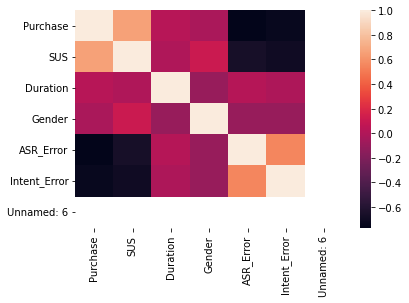

In [ ]:
sns.heatmap(dataFile.corr())

In [ ]:
le = LabelEncoder()

le.fit(dataFile['Purchase'])
dataFile['Purchase'] = le.transform(dataFile['Purchase'])

le.fit(dataFile['Gender'])
dataFile['Gender'] = le.transform(dataFile['Gender'])

print(dataFile.head(10))

   Purchase  SUS  Duration  Gender  ASR_Error  Intent_Error  Unnamed: 6
0         1   84       254       0          3             2         0.0
1         0   58       247       0          6             9         0.0
2         0   56       125       1          6             8         0.0
3         0   55        22       0         11             7         0.0
4         1   95       262       0          2             3         0.0
5         0   71       113       1          8             9         0.0
6         0   76        91       1          6             3         0.0
7         0   64        46       0          6            11         0.0
8         0   56       132       0          9             9         0.0
9         0   96       190       0         11             4         0.0


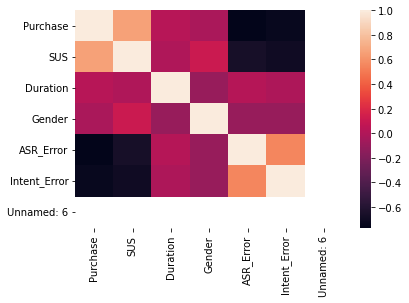

In [ ]:
sns.heatmap(dataFile.corr())

In [ ]:
import statsmodels.api as sm

y = dataFile['SUS'] # dependent variable
x = dataFile.drop(columns='SUS') # predictor variables

#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        23:55:33   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [ ]:
x = dataFile.drop(columns='SUS')
y = dataFile['SUS']

x_train, x_test, y_train, y_test = train_test_split(x, y)

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.3795018509357976


In [ ]:
y = dataFile['Purchase'].to_numpy()
y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
X = dataFile.drop('Purchase', axis = 1).to_numpy()
X

array([[ 84., 254.,   0.,   3.,   2.,   0.],
       [ 58., 247.,   0.,   6.,   9.,   0.],
       [ 56., 125.,   1.,   6.,   8.,   0.],
       [ 55.,  22.,   0.,  11.,   7.,   0.],
       [ 95., 262.,   0.,   2.,   3.,   0.],
       [ 71., 113.,   1.,   8.,   9.,   0.],
       [ 76.,  91.,   1.,   6.,   3.,   0.],
       [ 64.,  46.,   0.,   6.,  11.,   0.],
       [ 56., 132.,   0.,   9.,   9.,   0.],
       [ 96., 190.,   0.,  11.,   4.,   0.],
       [ 56., 146.,   0.,   9.,   7.,   0.],
       [ 80., 226.,   0.,   4.,   4.,   0.],
       [ 72.,  54.,   1.,   7.,   9.,   0.],
       [ 81., 104.,   0.,   2.,   3.,   0.],
       [ 72., 292.,   0.,   7.,   3.,   0.],
       [ 66., 126.,   0.,   8.,   9.,   0.],
       [ 89., 152.,   1.,   3.,   5.,   0.],
       [ 80., 221.,   0.,   3.,   4.,   0.],
       [ 66.,  51.,   0.,   9.,   9.,   0.],
       [ 74., 230.,   0.,   6.,   8.,   0.],
       [ 74.,  72.,   1.,   6.,   8.,   0.],
       [ 68., 284.,   0.,   6.,  11.,   0.],
       [ 9

In [ ]:
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [ ]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              preci

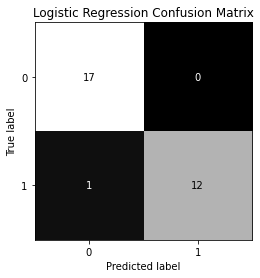

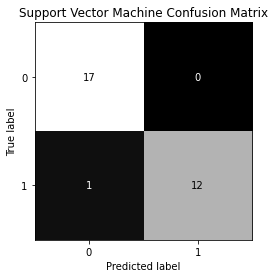

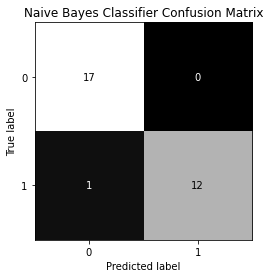

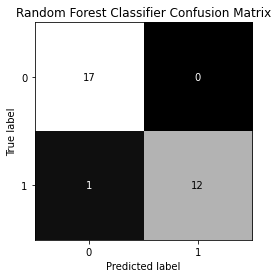

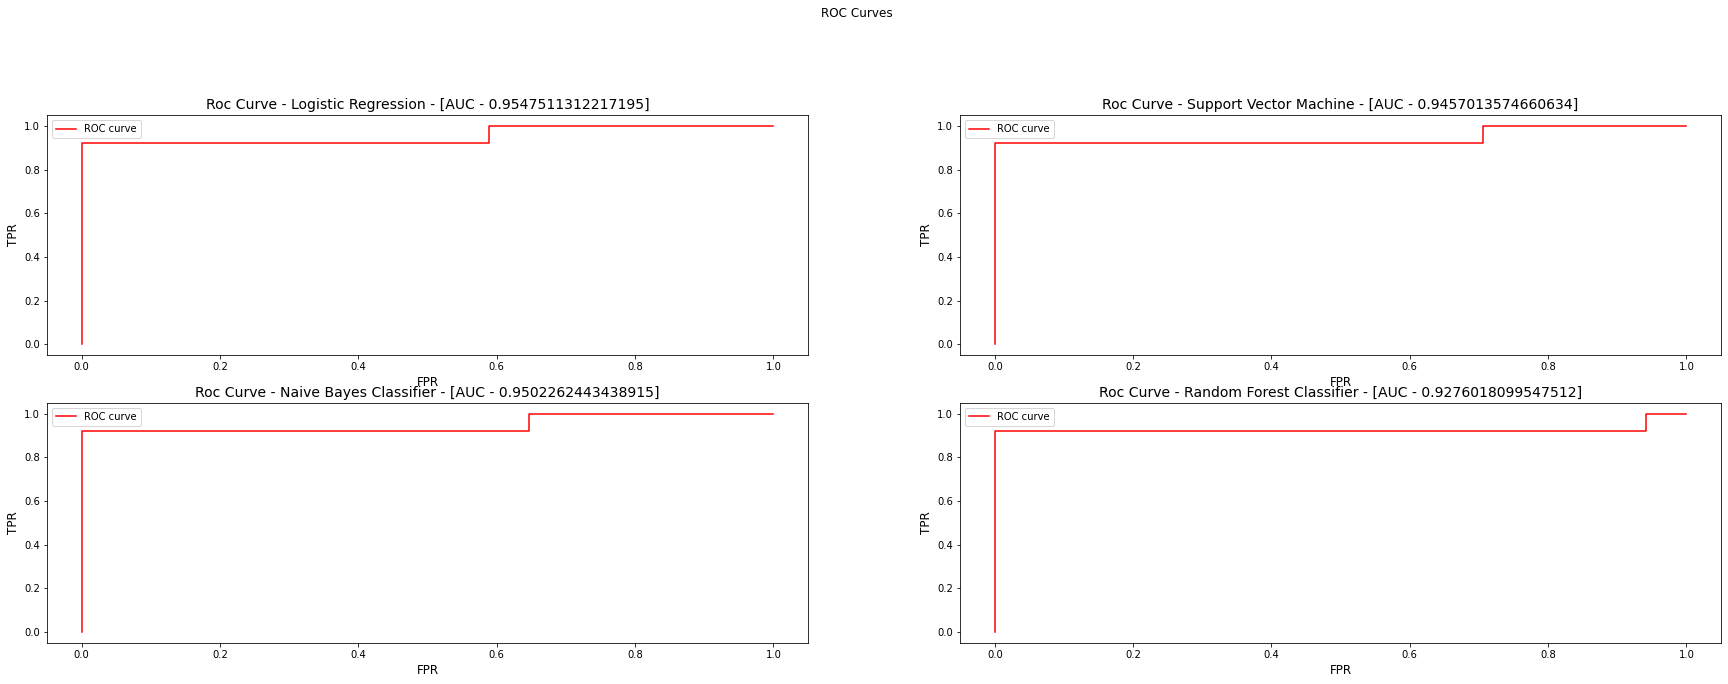

In [ ]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()